In [1]:
from joblib import Parallel, delayed

from simulation.outpatient import OPSimulation


class SimulationWrapper:
    def __init__(self):
        self.op_sim = OPSimulation(path_to_sql_queries="example_sql", site='mph', tfc=999)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["op_sim"].op_data.__dict__.pop("engine", None)
        return state

    def __setstate__(self, state):
        self.__dict__.update(state)

    def parallel_run(self, num_cores=-1, num_runs=1):
        results = Parallel(n_jobs=num_cores)(
            delayed(self.serial_run)(i) for i in range(num_runs)
        )
        return results

    def serial_run(self, run_id=0):
        seed, sim, opdept = self.op_sim.parameterise_simulation()
        sim.run_simulation()
        return seed, sim, opdept


In [2]:
import time

start = time.time()
sim_wrapper = SimulationWrapper()
results = sim_wrapper.serial_run()
# results = sim_wrapper.parallel_run(-1, 10)
end = time.time()
print(f"{end-start:.0f}s")

0 Reached
15 Reached
30 Reached
45 Reached
60 Reached
75 Reached
90 Reached
105 Reached
120 Reached
135 Reached
150 Reached
165 Reached
180 Reached
195 Reached
210 Reached
225 Reached
240 Reached
255 Reached
270 Reached
285 Reached
300 Reached
315 Reached
330 Reached
345 Reached
360 Reached
14s


In [3]:
metrics = results[1].graph.nodes["Simulate"]["capacity"].metrics.metrics

<Axes: >

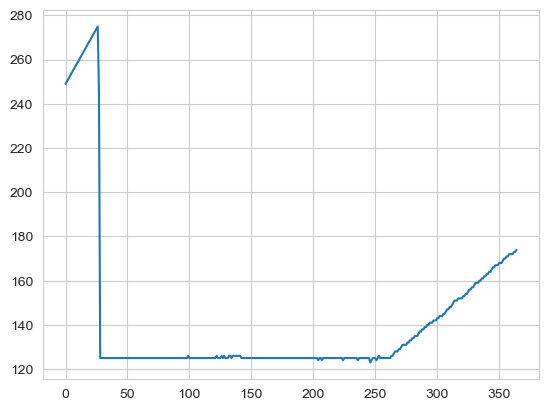

In [4]:
import seaborn as sns
sns.set_style("whitegrid")

sns.lineplot(metrics["maximum_wait_time"])

<Axes: >

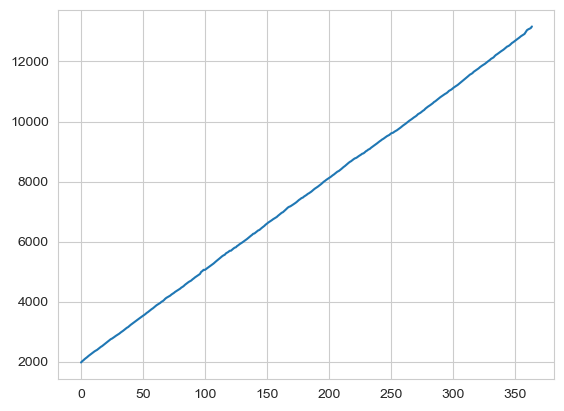

In [5]:
sns.lineplot(metrics["wait_list_length"])

NameError: name 'pd' is not defined

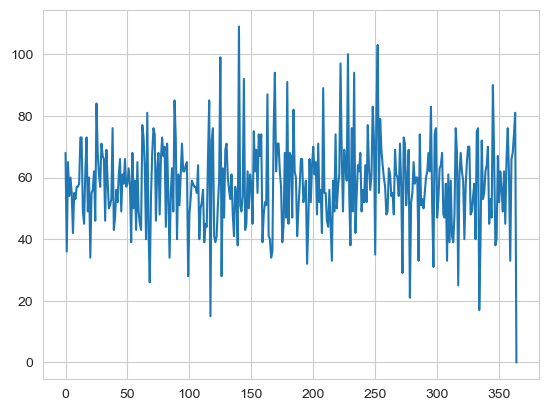

In [6]:
sns.lineplot(metrics["num_patients_seen"])

pd.DataFrame(metrics["num_patients_seen"]).sort_values(by=0)

<Axes: >

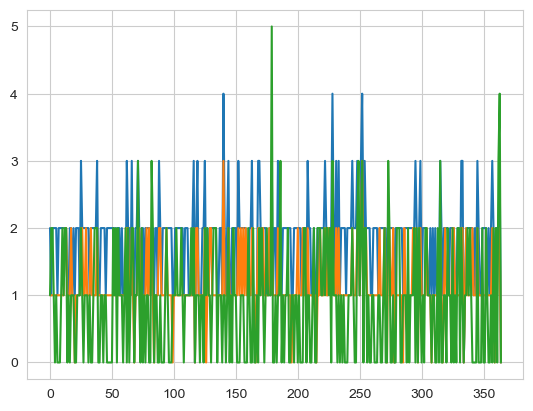

In [7]:
sns.lineplot(metrics["num_dnas"])
sns.lineplot(metrics["num_cancellations"])
sns.lineplot(metrics["num_discharged"])

<Axes: >

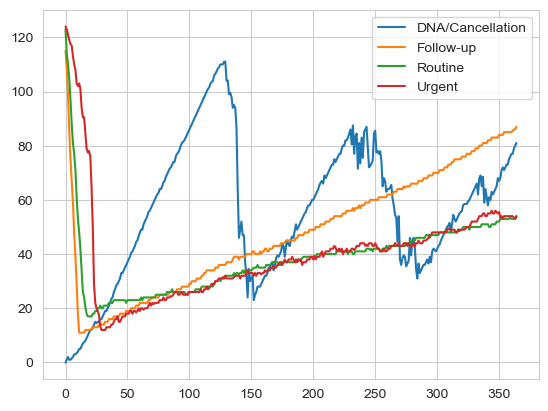

In [8]:
import pandas as pd

pd.DataFrame(metrics["median_wait_times_by_priority"]).plot()


In [ ]:
metrics.keys()